In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn import metrics

In [2]:
df_cct = pd.read_parquet("/home/onyxia/work/df_cct_stand2.parquet")

### Correlation map

<Axes: >

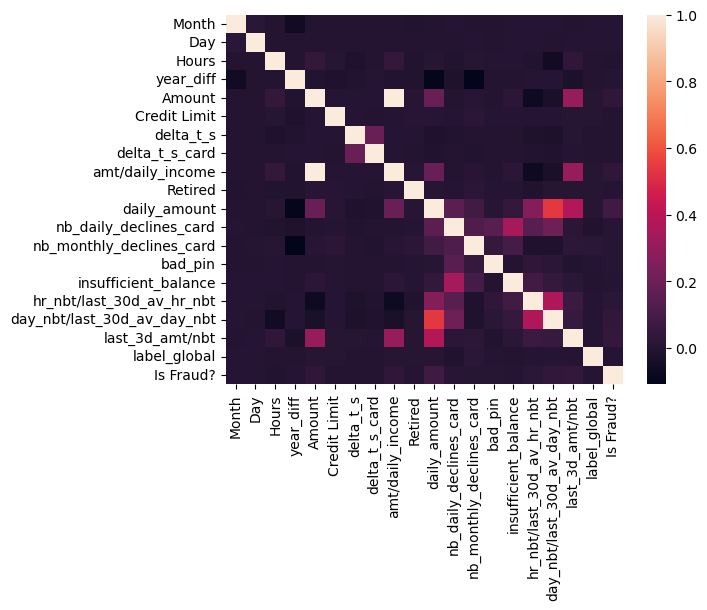

In [3]:
sns.heatmap(df_cct[['Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'label_global',
       'Is Fraud?']].corr())

In [3]:
df_cct.columns

Index(['User', 'Card', 'Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Use Chip', 'Card Brand', 'Card Type', 'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'label_global',
       'Is Fraud?'],
      dtype='object')

### Preprocessing (code to create standarized (by User) dataset) - DO NOT RUN

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df_cct.loc[:,~df_cct.columns.isin(["User","Card","label_global","Retired", "bad_pin", "insufficient_balance","Is Fraud?"])].select_dtypes(include=numerics).columns.to_list()
cat = df_cct.select_dtypes(include=['object']).columns.to_list()


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df = pd.DataFrame()
for i in range(2000):
    user_i = df_cct[df_cct["User"] == i]
    user_i[num] = scaler.fit_transform(user_i[num])
    df = pd.concat([df,user_i], axis=0)


In [51]:
#df.to_parquet("/home/onyxia/work/df_cct_stand2.parquet")

### Encode categorical variables

In [3]:
# Pour "Use Chip":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Use Chip"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [4]:
# Pour "Card Brand":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Card Brand"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [5]:
# Pour "Card Type"":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Card Type"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [6]:
df_cct.columns

Index(['User', 'Card', 'Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Use Chip', 'Card Brand', 'Card Type', 'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'label_global',
       'Is Fraud?', 'Chip Transaction', 'Online Transaction',
       'Swipe Transaction', 'Amex', 'Discover', 'Mastercard', 'Visa', 'Credit',
       'Debit', 'Debit (Prepaid)'],
      dtype='object')

### Manually create train/test datasets

In [6]:
# selecting features
# dropped card, nb_weekly_declines, day_of_week, nb_daily_declines, credit, debit, amex,  discover,
# mastercard, visa
features = ['Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'Chip Transaction', 'Online Transaction',
       'Swipe Transaction','Debit (Prepaid)',
        "label_global","Is Fraud?"]
df_selec = df_cct[features] # 21 features
X = df_selec[['Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'Chip Transaction', 'Online Transaction',
       'Swipe Transaction','Debit (Prepaid)']]
y = df_selec["Is Fraud?"]

In [7]:
df_selec.groupby("label_global").count() # cluster 6 has the smallest number of samples

,Month,Day,Hours,year_diff,Amount,Credit Limit,delta_t_s,delta_t_s_card,amt/daily_income,Retired,...,bad_pin,insufficient_balance,hr_nbt/last_30d_av_hr_nbt,day_nbt/last_30d_av_day_nbt,last_3d_amt/nbt,Chip Transaction,Online Transaction,Swipe Transaction,Debit (Prepaid),Is Fraud?
label_global,,,,,,,,,,,,,,,,,,,,,
-1,128573,128573,128573,128573,128573,128573,128573,128573,128573,128573,...,128573,128573,128573,128573,128573,128573,128573,128573,128573,128573
0,22255591,22255591,22255591,22255591,22255591,22255591,22255591,22255591,22255591,22255591,...,22255591,22255591,22255591,22255591,22255591,22255591,22255591,22255591,22255591,22255591
1,642070,642070,642070,642070,642070,642070,642070,642070,642070,642070,...,642070,642070,642070,642070,642070,642070,642070,642070,642070,642070
2,625709,625709,625709,625709,625709,625709,625709,625709,625709,625709,...,625709,625709,625709,625709,625709,625709,625709,625709,625709,625709
3,565901,565901,565901,565901,565901,565901,565901,565901,565901,565901,...,565901,565901,565901,565901,565901,565901,565901,565901,565901,565901
4,82195,82195,82195,82195,82195,82195,82195,82195,82195,82195,...,82195,82195,82195,82195,82195,82195,82195,82195,82195,82195
5,82182,82182,82182,82182,82182,82182,82182,82182,82182,82182,...,82182,82182,82182,82182,82182,82182,82182,82182,82182,82182
6,4679,4679,4679,4679,4679,4679,4679,4679,4679,4679,...,4679,4679,4679,4679,4679,4679,4679,4679,4679,4679


In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

In [9]:
df_trainval = df_selec.iloc[X_train_val.index]

In [10]:
df_cluster_stat = pd.DataFrame(columns = ["cluster", "count", "percentage_of_frauds"])
for i in range(-1, 7, 1):
    share = len(df_trainval[(df_trainval["label_global"] == i) & (df_trainval["Is Fraud?"] == 1)]) / len(df_trainval[df_trainval["label_global"] == i]) 
    df_cluster_stat.loc[len(df_cluster_stat)] = [i, len(df_trainval[df_trainval["label_global"] == i]),share]
df_cluster_stat["cluster"] = df_cluster_stat["cluster"].astype(int)

In [11]:
df_cluster_stat

,cluster,count,percentage_of_frauds
0,-1,102800.0,0.001089
1,0,17803706.0,0.001217
2,1,513628.0,0.001053
3,2,501117.0,0.001319
4,3,453143.0,0.001620
5,4,65702.0,0.000609
6,5,65701.0,0.000837
7,6,3723.0,0.000000


In [15]:
import random # manually creating train dataset (65701 from each cluster except for cluster 6)
# random sampling among each cluster created from DBSCAN work
# in total, 463624 rows
random.seed(42)
df_train = pd.DataFrame()
for i in range(-1,7,1) :
    df_cluster = df_trainval[df_trainval["label_global"] == i]
    df_cluster_fraud = df_cluster[df_cluster["Is Fraud?"] == 1]
    df_cluster_nofraud = df_cluster[df_cluster["Is Fraud?"] == 0]
    if i == 6 or i == 5:
        df_rs = df_cluster
    else :
        df_small_cluster = df_trainval[df_trainval["label_global"] == 5]
        df_rs = pd.concat([df_cluster_fraud.sample(int(df_cluster_stat.loc[i+1, "percentage_of_frauds"]*len(df_small_cluster)),random_state = 42), 
        df_cluster_nofraud.sample(int((1-df_cluster_stat.loc[i+1, "percentage_of_frauds"])*len(df_small_cluster)),random_state = 42)], axis = 0)
    df_train = pd.concat([df_train, df_rs], axis= 0)


In [21]:
#X_train, y_train, contains 505 frauds
X_train = df_train.drop(["label_global","Is Fraud?"], axis = 1)
y_train = df_train["Is Fraud?"]

In [22]:
# retrieving frauds for later use
i_fraud = y_train[y_train.values == 1].index
X_train_fraud = X_train.loc[i_fraud]
i_no_fraud = y_train[y_train.values == 0].index
X_train_no_fraud = X_train.loc[i_no_fraud]

In [25]:
# test set : 55,000 rows, contains 5,000 frauds
df_rest = df_selec[~df_selec.index.isin(df_train.index)] # selecting the resting rows not taken for train set
df_rest_fraud = df_rest[df_rest["Is Fraud?"] == 1]
df_rest_no_fraud = df_rest[df_rest["Is Fraud?"] == 0]
df_val = pd.concat([df_rest_fraud.sample(5000, random_state = 42), df_rest_no_fraud.sample(50000, random_state = 42)], axis = 0)
df_val.sort_index(inplace=True)

In [26]:
X_val = df_val.drop(["label_global", "Is Fraud?"], axis = 1)
y_val = df_val["Is Fraud?"]

### Base - first model

In [27]:
# Build and train model without any hyperparameters
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
print(decision_tree.tree_.max_depth)
# Apply model to validation data
y_pred = decision_tree.predict(X_val)


27


Classification metrics: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     50000
           1       0.87      0.09      0.17      5000

    accuracy                           0.92     55000
   macro avg       0.89      0.55      0.56     55000
weighted avg       0.91      0.92      0.88     55000



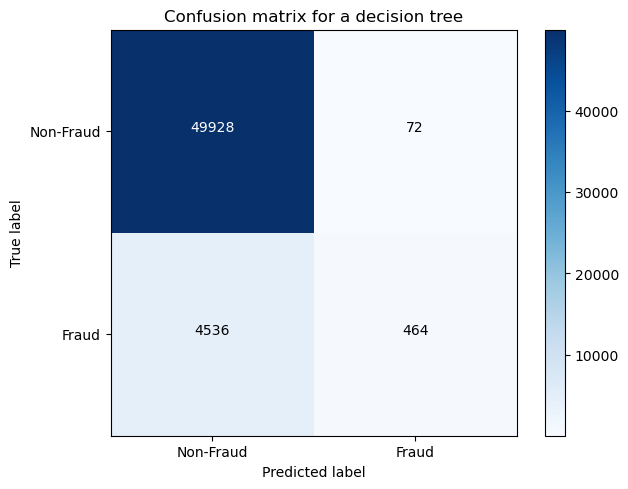

In [28]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_pred))
# plot confusion matrix function
import itertools

def plot_confusion_matrix(cm,normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        classes=['Non-Fraud','Fraud']
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)
        
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            # print("Normalized confusion matrix")
        else:
            1  # print('Confusion matrix, without normalization')

        # print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return ()


cnf_matrix_dtree = confusion_matrix(y_val, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix_dtree, title='Confusion matrix for a decision tree')
plt.show()

### SHAP values

In [25]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(decision_tree)

In [16]:
# selecting 15,000 frauds and 15,000 non frauds from train set
# otherwise, computation time is too big

X_train_shap = pd.concat([X_train_fraud, X_train_no_fraud.sample(len(X_train_fraud), random_state = 42)], axis = 0)

In [26]:
shap_values = explainer.shap_values(X_train_shap)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


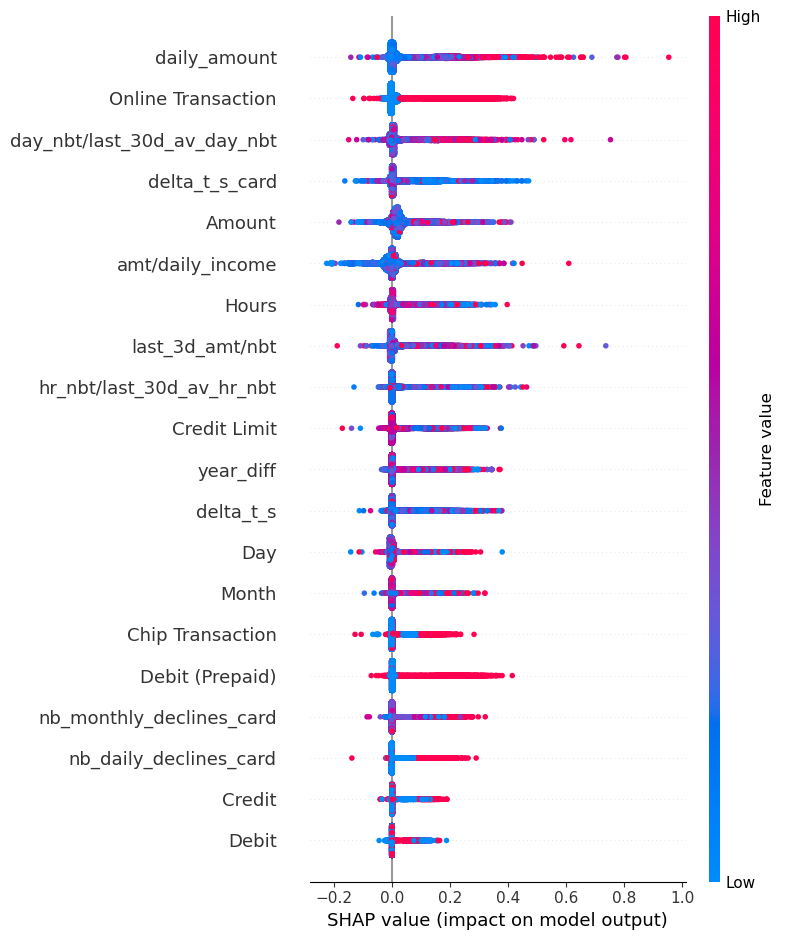

In [29]:
shap.summary_plot(shap_values[1], X_train_shap)

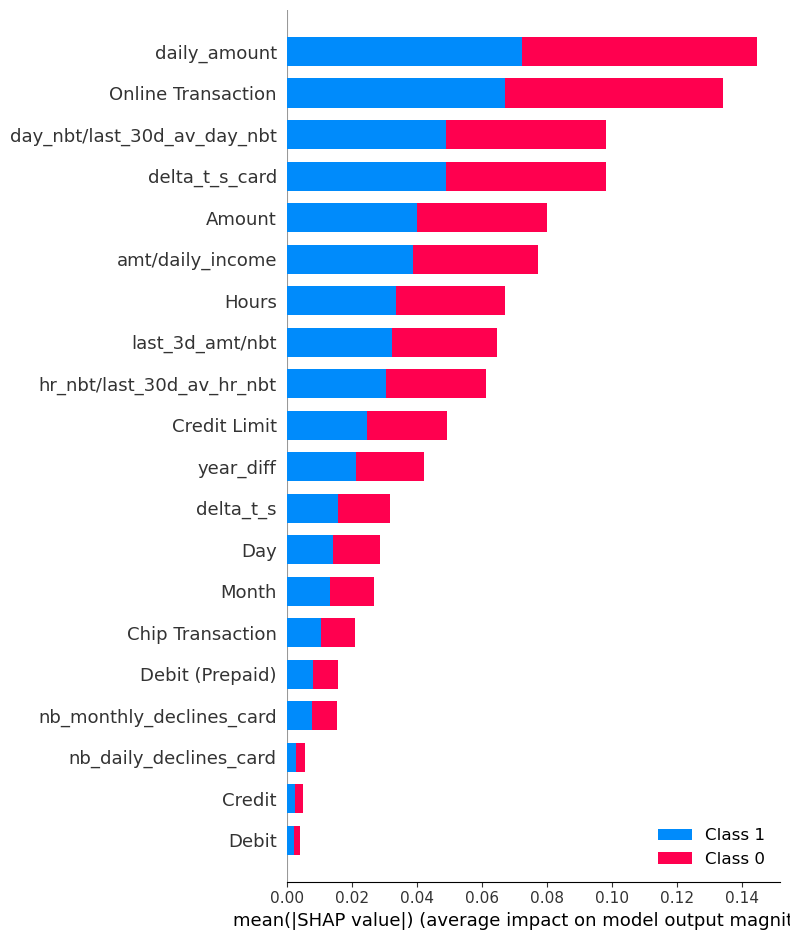

In [27]:
shap.summary_plot(shap_values, X_train_shap ,feature_names = X_train_shap.columns, plot_type="bar") 
# we can drop the 7 last ones : mastercard, amex, visa, discover, debit, credit, nb_daily_declines_card

### Tuning Hyperparameters

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {"class_weight" : [{1:i/100,0:1-i/100} for i in range(80, 100, 2)]}
clf = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42), 
param_grid = param_grid, scoring = 'f1', n_jobs = -1, cv = 3, verbose = True)
clf_fit = clf.fit(X_train, y_train)
clf_fit.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


DecisionTreeClassifier(class_weight={0: 0.14, 1: 0.86}, random_state=42)

Text(0.5, 1.0, 'f1-score according to param_class_weight (decision tree)')

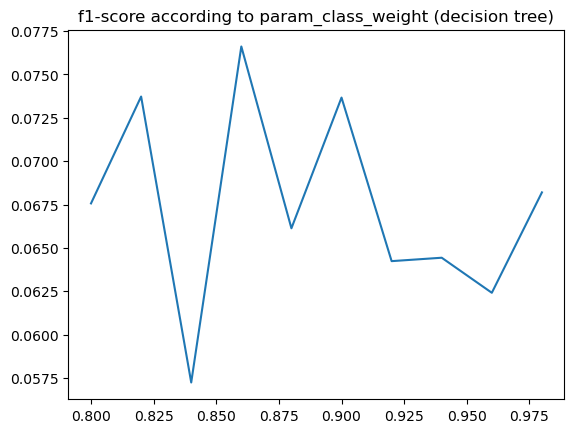

In [49]:
df_f1_score = pd.DataFrame(clf_fit.cv_results_)[["param_class_weight", "mean_test_score"]]
df_f1_score["param_class_weight"] = [i/100 for i in range(80,100,2)]
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(df_f1_score.iloc[:,0].values, df_f1_score.iloc[:,1].values)
plt.title('f1-score according to param_class_weight (decision tree)')

In [55]:
param_grid = {'min_samples_leaf' : [i for i in range(1,100,5)], 
'max_depth' : [i for i in range(1,27)],
'max_features' : [5, 10, 15, 20, 0.3, 0.5, 0.7, 0.9, "auto", "sqrt", "log2", None]}
clf = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42), 
param_grid = param_grid, scoring = 'f1', n_jobs = -1, cv = 3, verbose = True)
clf_fit = clf.fit(X_train, y_train)
clf_fit.best_estimator_


Fitting 3 folds for each of 6240 candidates, totalling 18720 fits


/opt/mamba/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/mamba/lib/pytho

DecisionTreeClassifier(max_depth=14, max_features=20, min_samples_leaf=6,
                       random_state=42)

### Optimal model

14
Classification metrics: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     50000
           1       0.88      0.18      0.29      5000

    accuracy                           0.92     55000
   macro avg       0.90      0.59      0.63     55000
weighted avg       0.92      0.92      0.90     55000



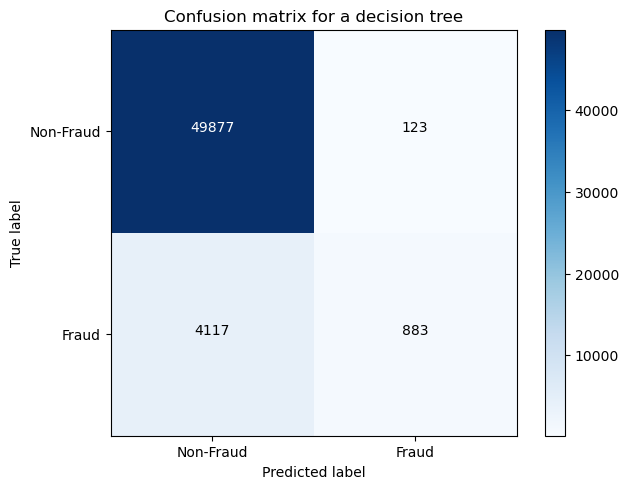

In [56]:
# Build and train model
decision_tree_opt = DecisionTreeClassifier(class_weight = {1:0.86, 0:0.14}, 
max_depth = 14, min_samples_leaf = 6, max_features = 20, random_state = 42)
decision_tree_opt.fit(X_train, y_train)
print(decision_tree_opt.tree_.max_depth)
# Apply model to validation data
y_pred_opt = decision_tree_opt.predict(X_val)

# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_pred_opt))

cnf_matrix_dtree = confusion_matrix(y_val, y_pred_opt)
plt.figure()
plot_confusion_matrix(cnf_matrix_dtree, title='Confusion matrix for a decision tree')
plt.show()

### Random Forest

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Text(0.5, 1.0, 'f1-score according to param_class_weight (decision tree)')

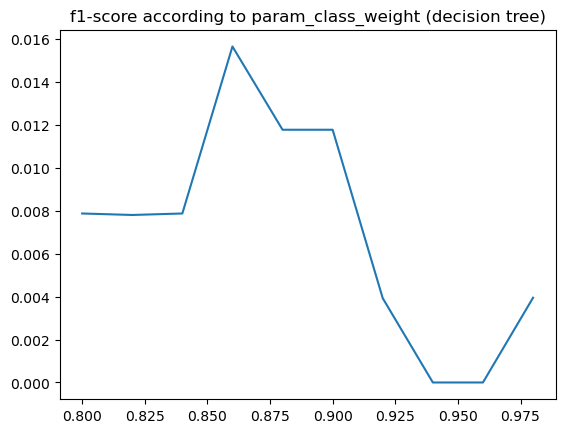

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {"class_weight" : [{1:i/100,0:1-i/100} for i in range(80, 100, 2)]}
clf = GridSearchCV(estimator = RandomForestClassifier(random_state = 42, n_jobs = -1), 
param_grid = param_grid, scoring = 'f1', n_jobs = -1, cv = 3, verbose = True)
clf_fit = clf.fit(X_train, y_train)
clf_fit.best_estimator_

df_f1_score = pd.DataFrame(clf_fit.cv_results_)[["param_class_weight", "mean_test_score"]]
df_f1_score["param_class_weight"] = [i/100 for i in range(80,100,2)]
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(df_f1_score.iloc[:,0].values, df_f1_score.iloc[:,1].values)
plt.title('f1-score according to param_class_weight (random forest)')

In [69]:
param_grid = {'min_samples_leaf' : [i for i in range(1,100,5)], 
'max_depth' : [i for i in range(1,27)],
'max_features' : [5, 10, 15, 20, 0.3, 0.5, 0.7, 0.9, "auto", "sqrt", "log2", None]}
rf = GridSearchCV(estimator = RandomForestClassifier(class_weight = {1:0.86, 0:0.14}, 
random_state = 42, n_jobs = -1), 
param_grid = param_grid, scoring = 'f1', n_jobs = -1, cv = 3, verbose = True)
rf_fit = rf.fit(X_train, y_train)
rf_fit.best_estimator_


Fitting 3 folds for each of 6240 candidates, totalling 18720 fits


/opt/mamba/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/ense

Classification metrics: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     50000
           1       0.99      0.04      0.08      5000

    accuracy                           0.91     55000
   macro avg       0.95      0.52      0.52     55000
weighted avg       0.92      0.91      0.87     55000



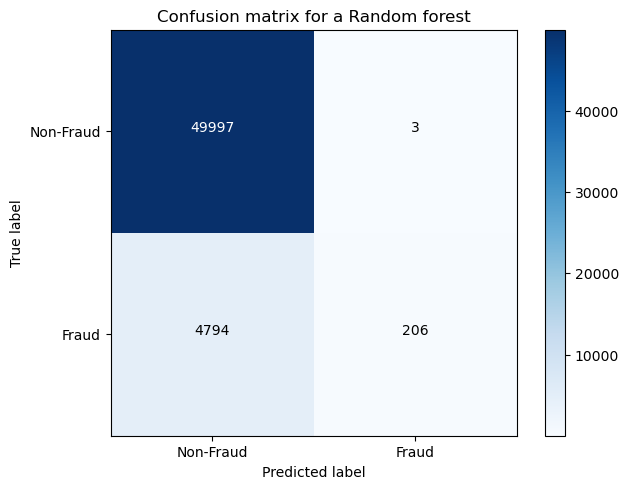

In [64]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(class_weight={1:0.86,0:0.14}, min_samples_leaf = 30,

random_state = 42, n_jobs = -1)
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_val)

# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_pred_rf))
cnf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure()
plot_confusion_matrix(cnf_matrix_rf, title='Confusion matrix for a Random forest')
plt.show()